In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Largest-Banks.csv")
df.head()

,Rank,Bank name,Country,Total assets 2022 (US$ billion)
0,1,Industrial and Commercial Bank of China Limited,China,5742.86
1,2,China Construction Bank,China,5016.81
2,3,Agricultural Bank of China,China,4919.03
3,4,Bank of China,China,4192.12
4,5,JPMorgan Chase,United States of America,3665.74


In [3]:
df.tail()

,Rank,Bank name,Country,Total assets 2022 (US$ billion)
95,96,National Bank of Canada,Canada,312.67
96,97,Macquarie Group,Australia,313.47
97,98,Nationwide Building Society,United Kingdom,311.93
98,99,Raiffeisen Gruppe,Switzerland,303.50
99,100,First Abu Dhabi Bank,United Arab Emirates,302.22


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             100 non-null    int64  
 1   Bank name                        100 non-null    object 
 2   Country                          100 non-null    object 
 3   Total assets 2022 (US$ billion)  100 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [6]:
df.describe()

,Rank,Total assets 2022 (US$ billion)
count,100.000000,100.000000
mean,50.500000,1119.201100
std,29.011492,1076.163241
min,1.000000,302.220000
25%,25.750000,415.735000
50%,50.500000,677.285000
75%,75.250000,1448.850000
max,100.000000,5742.860000


In [7]:
df.isnull().sum()

Rank                               0
Bank name                          0
Country                            0
Total assets 2022 (US$ billion)    0
dtype: int64

In [8]:
df.nunique()

Rank                               100
Bank name                          100
Country                             25
Total assets 2022 (US$ billion)    100
dtype: int64

In [9]:
# Handle missing values 
df.fillna(df.mean(), inplace=True)

## Change Column Name

In [10]:
df.rename(columns={df.columns[3]: "Total assets"}, inplace=True)


### Countries with the Highest Total Assets



In [11]:
df2 = df.groupby('Country')['Total assets'].sum().sort_values(ascending=False).reset_index()
df2

,Country,Total assets
0,China,34823.85
1,United States of America,16285.21
2,Japan,10804.53
3,France,10594.66
4,United Kingdom,7745.56
5,Canada,5961.83
6,Spain,3220.04
7,Australia,3153.49
8,Germany,2955.48
9,South Korea,2690.23


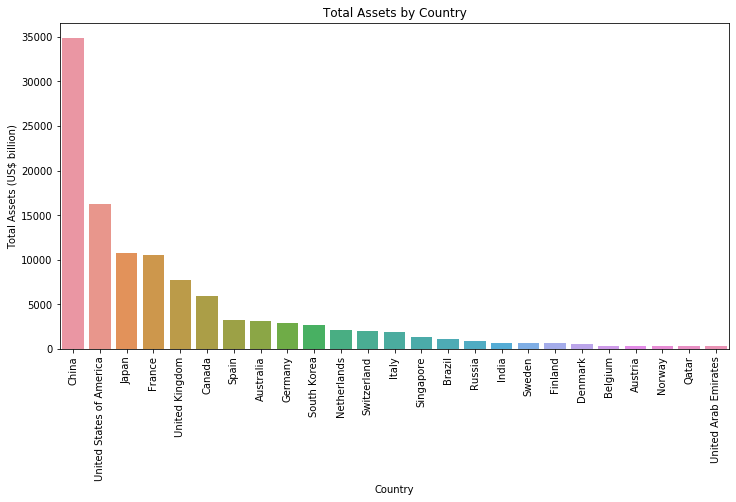

In [12]:
df2 = df.groupby('Country')['Total assets'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df2, x='Country', y='Total assets')
plt.xlabel('Country')
plt.ylabel('Total Assets (US$ billion)')
plt.title('Total Assets by Country')
plt.xticks(rotation=90)
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Encode categorical variables (One-Hot Encoding for 'Country' column)

In [14]:
df_encoded = pd.get_dummies(df, columns=['Country'], drop_first=True)


# Data Preprocessing

In [15]:
X = df[['Rank']]  # Use appropriate features
y = df['Total assets']

# Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling 

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [18]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model Evaluation

In [19]:

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 708819.593079757


# Model Interpretation:
Analyze the coefficients of the linear regression model to understand the impact of each feature on the target variable.

In [20]:
# Access coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-813.01029479]
Intercept: 1069.548875


# Visualize Predictions:

Plot the actual vs. predicted values to visually assess how well the model is performing.

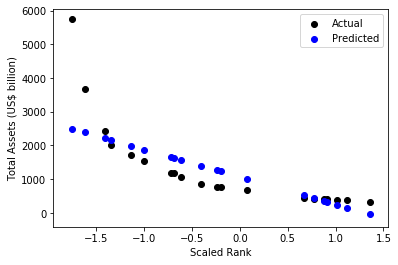

In [21]:
import matplotlib.pyplot as plt

plt.scatter(X_test_scaled, y_test, color='black', label='Actual')
plt.scatter(X_test_scaled, y_pred, color='blue', label='Predicted')
plt.xlabel('Scaled Rank')
plt.ylabel('Total Assets (US$ billion)')
plt.legend()
plt.show()

# Residual Analysis:

Check the residuals (the differences between actual and predicted values) to ensure they are normally distributed and do not show a pattern.

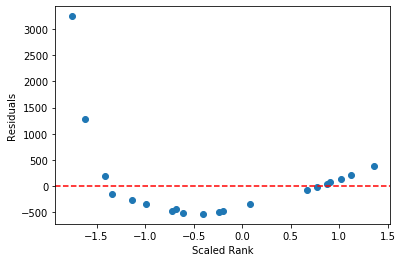

In [22]:
residuals = y_test - y_pred

plt.scatter(X_test_scaled, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Scaled Rank')
plt.ylabel('Residuals')
plt.show()


# Cross-Validation:

Perform cross-validation to get a more robust estimate of the model's performance.
python

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming 'X' and 'y' are your features and target variable
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cross-Validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error:", -cv_scores.mean())


Cross-Validation Mean Squared Error: 1036086.5390297801


# conclusion:

In this analysis, I loaded a dataset on the largest banks, performed data preprocessing including handling missing values and one-hot encoding, and engineered a new feature. Utilizing a linear regression model, I trained and evaluated its performance on predicting total assets. The model's performance was assessed using Mean Squared Error, and additional analyses included interpreting coefficients, visualizing predictions, and cross-validation. Opportunities for improvement involve exploring more complex models and further feature analysis.